In [1]:
import pandas as pd
import seaborn as sns
from pydataset import data
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# Notice that smoker is a binary
df.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [3]:
# Get_dummies on a column with only two possible values produces a column for each value
# Notice how we have a column for each possible value..
# But this is redundant, since smoker or non-smoker are mutually exclusive.
pd.get_dummies(df[["smoker"]]).head()

,smoker_No,smoker_Yes
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0


In [4]:
# The drop_first argument accounts for this duplication
# Notice how if smoker_Yes is 1, then that row is a smoker.
pd.get_dummies(df[["smoker"]], drop_first=True).head()

,smoker_Yes
1,0
2,0
3,0
4,0
5,0


In [5]:
# But what about categories with more than two values?
# This dataset has 4 values for "day"
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [6]:
# Notice how we have 4 possible day values, so we get 4 boolean columns
pd.get_dummies(df[["day"]]).head(4)

,day_Fri,day_Sat,day_Sun,day_Thur
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [7]:
# Again, drop_first reduces some redundancy. 
# If day_Sat is 0 and day_Sun is 0 and day_Thur is 0, then by process of elimination, that row is a Friday.
pd.get_dummies(df[["day"]], drop_first=True).head(4)

,day_Sat,day_Sun,day_Thur
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


## For Exploratory Data Analysis, we usually use the un-encoded data
- For people, the "Yes", "No", "Male", and "Female" labels are easier to read than zeros and ones

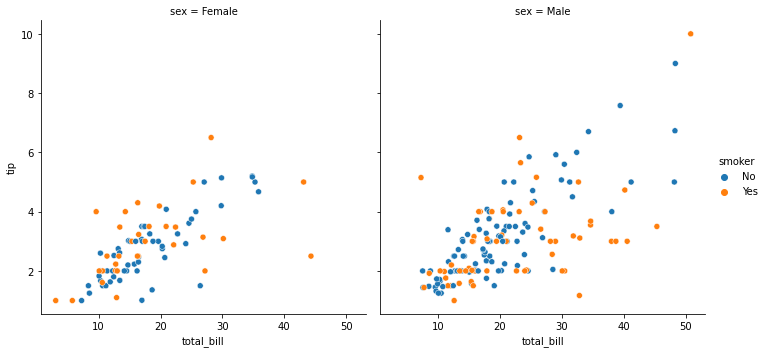

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="sex", data=df)

### Notice how the visual below is easier to read and visualize than if we had 4 binary columns

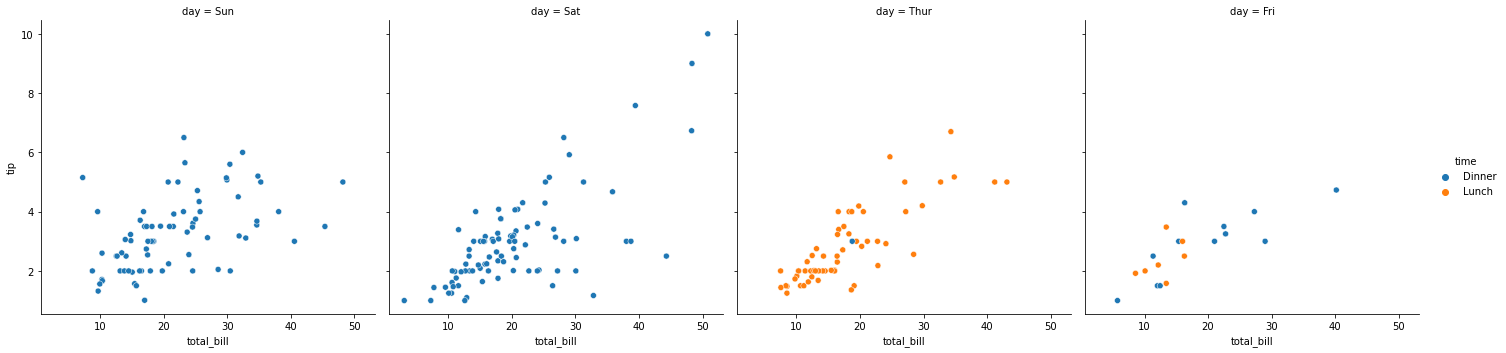

In [9]:
sns.relplot(x="total_bill", y="tip", hue="time", col="day", data=df)

## For Modeling, Models need to have encoded categorical variables for their input.
- Models don't talk strings. They can only talk numbers.

In [10]:
dummies = pd.get_dummies(df[["sex", "smoker", "day", "time"]], drop_first=True)
dummies

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,0,0,0,1,0,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0
5,0,0,0,1,0,0
...,...,...,...,...,...,...
240,1,0,1,0,0,0
241,0,1,1,0,0,0
242,1,1,1,0,0,0
243,1,0,1,0,0,0


In [11]:
only_numerics = df[["tip", "total_bill", "size"]]
only_numerics

,tip,total_bill,size
1,1.01,16.99,2
2,1.66,10.34,3
3,3.50,21.01,3
4,3.31,23.68,2
5,3.61,24.59,4
...,...,...,...
240,5.92,29.03,3
241,2.00,27.18,2
242,2.00,22.67,2
243,1.75,17.82,2


In [12]:
encoded_df = pd.concat([only_numerics, dummies], axis=1)
encoded_df

,tip,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,1.01,16.99,2,0,0,0,1,0,0
2,1.66,10.34,3,1,0,0,1,0,0
3,3.50,21.01,3,1,0,0,1,0,0
4,3.31,23.68,2,1,0,0,1,0,0
5,3.61,24.59,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
240,5.92,29.03,3,1,0,1,0,0,0
241,2.00,27.18,2,0,1,1,0,0,0
242,2.00,22.67,2,1,1,1,0,0,0
243,1.75,17.82,2,1,0,1,0,0,0


## The `encoded_df` is what we'll need to send into our model.

## Remember that it's OK to explore the un-encoded data, but only explore `train`, not the entire dataset.
- Your stakeholders don't want to see 0 and 1 on chart labels 
- *NOTE* This example skipped the train/validate/test split in order to focus on the encoding issue.
- You'll also need to break out your `X` features and your `y` target variable